In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load an image from file in RGB format
dara_rgb = cv2.imread('DaraInCicinnati.jpg', cv2.IMREAD_COLOR)

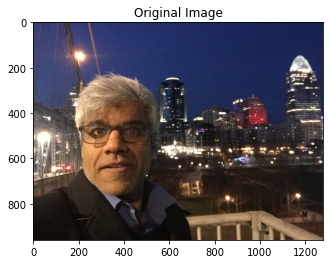

In [3]:
# Display the original RGB image
plt.imshow(cv2.cvtColor(dara_rgb, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

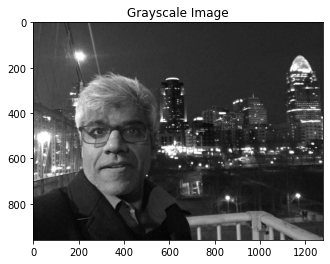

In [4]:
# Convert the RGB image to grayscale
dara_gray = cv2.cvtColor(dara_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(dara_gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

In [5]:
# Apply the Sobel filter for edge detection
sobel_x = cv2.Sobel(dara_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(dara_gray, cv2.CV_64F, 0, 1, ksize=3)

In [6]:
# Compute the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

In [7]:
# Normalize the gradient magnitude to 0-255
sobel_magnitude_normalized = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

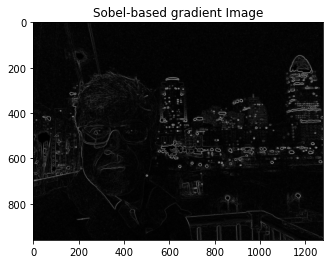

In [8]:
plt.imshow(sobel_magnitude_normalized, cmap='gray')
plt.title('Sobel-based gradient Image')
plt.show()

The Scharr filter is an image processing filter used for edge detection and gradient computation. It is particularly useful for detecting edges in images due to its improved rotational symmetry compared to some other edge detection filters like the Sobel filter. The Scharr filter calculates the gradient of an image, which represents how pixel intensities change across the image.

The Scharr filter is commonly used in computer vision and image processing tasks, including edge detection, feature extraction, and image enhancement. It is known for its improved accuracy and reduced sensitivity to diagonal edges compared to some other filters like the Sobel filter.

In [9]:
# Apply the Scharr filter for edge detection
scharr_x = cv2.Scharr(dara_gray, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(dara_gray, cv2.CV_64F, 0, 1)

In [10]:
# Compute the gradient magnitude
scharr_magnitude = np.sqrt(scharr_x**2 + scharr_y**2)

In [11]:
# Normalize the gradient magnitude to 0-255
scharr_magnitude_normalized = cv2.normalize(scharr_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

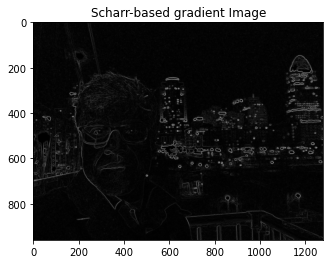

In [12]:
plt.imshow(scharr_magnitude_normalized, cmap='gray')
plt.title('Scharr-based gradient Image')
plt.show()

In [13]:
diff = scharr_magnitude_normalized - sobel_magnitude_normalized
print(np.sum(diff))

102548811


In [14]:
sobel_gy = np.array([[1,2,3],[0,0,0],[-1,-2,-3]])
sobel_gy

array([[ 1,  2,  3],
       [ 0,  0,  0],
       [-1, -2, -3]])

In [15]:
sobel_gx = np.transpose(sobel_gy)
sobel_gx

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 3,  0, -3]])